In [1]:
import matplotlib.pyplot as pyplot
%matplotlib inline

In [2]:
# loading scripts are in scripts/dataset.py
from scripts import dataset
import chainer
import os

# example code from tests/test_snapshot.py
dataset_name = 'lsp'
#dataset_name = 'lsp'

if dataset_name == 'mpii':
    DATASET_ROOT = os.path.expanduser('~/data/mpii')  # MPII dataset is here
    TEST_CV_FILEPATH = os.path.join(DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(MPII_DATASET_ROOT, 'images')
    symmetric_joints = "[[12, 13], [11, 14], [10, 15], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -100500
else:
    DATASET_ROOT = os.path.expanduser('~/data/lsp')  # LSP dataset is here
    TEST_CV_FILEPATH = os.path.join(DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(DATASET_ROOT, 'images')
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1

test_dataset = dataset.PoseDataset(
        TEST_CV_FILEPATH,
        IMG_PATH_PREFIX, 227,
        fliplr=False, rotate=False,
        shift=None,
        bbox_extension_range=(1.0, 1.0),
        coord_normalize=True,
        gcn=True,
        fname_index=0,
        joint_index=1,
        symmetric_joints=symmetric_joints,
        ignore_label=ignore_label,
        should_return_bbox=True,
        should_downscale_images=True,
        downscale_height=400
)

201it [00:00, 2001.13it/s]

Reading dataset from /home/yyoo/data/lsp/test_joints.csv
Downscale images to the height 400px


1000it [00:00, 1981.87it/s]

Joints shape: (14, 2)


In [3]:
whos

Variable           Type           Data/Info
-------------------------------------------
DATASET_ROOT       str            /home/yyoo/data/lsp
IMG_PATH_PREFIX    str            /home/yyoo/data/lsp/images
TEST_CV_FILEPATH   str            /home/yyoo/data/lsp/test_joints.csv
chainer            module         <module 'chainer' from '/<...>ges/chainer/__init__.py'>
dataset            module         <module 'scripts.dataset'<...>pose/scripts/dataset.py'>
dataset_name       str            lsp
ignore_label       int            -1
os                 module         <module 'os' from '/usr/lib/python3.5/os.py'>
pyplot             module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
symmetric_joints   str            [[8, 9], [7, 10], [6, 11]<...>, [2, 3], [1, 4], [0, 5]]
test_dataset       PoseDataset    <scripts.dataset.PoseData<...>object at 0x7f1c92f808d0>


In [4]:
test_dataset?

In [5]:
test_dataset??

162 112 3
/home/yyoo/data/lsp/images/im1012.jpg
[[  48.21939388  128.98417855]
 [  24.95710876  105.72189343]
 [  40.94992978   81.83651138]
 [  57.35814875   82.66730727]
 [  75.22026055  111.32976573]
 [  87.47450003  137.4998365 ]
 [  26.41100158   76.43633804]
 [  25.78790465   56.08183856]
 [  28.6956903    36.14273702]
 [  63.79681696   34.06574728]
 [  81.2435308    52.55095599]
 [  83.52821952   75.39784317]
 [  43.65001645   32.19645651]
 [  39.91143491   12.25735497]]
14


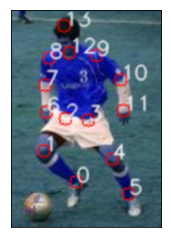

In [67]:
## Plot original images

import cv2
from matplotlib import pyplot as plt

imageIdx = 11
# get original image: HWC BGR original image (not cropped)
img=test_dataset.get_original_image(imageIdx)
h,w,d=img.shape
print(h,w,d)

imgFilename, joints = test_dataset.joints[imageIdx]
print(imgFilename)
print(joints)
    
# mark joints
def markJoints(img, joints):
    
    numJoints, t = joints.shape
    print(numJoints)

    circSize=10
    font = cv2.FONT_HERSHEY_SIMPLEX

    for i in range(numJoints):
        x = int(joints[i,0])
        y = int(joints[i,1])
    
        cv2.circle(img, (x, y), 5, (255, 0, 0)) #, -1)
    
        #cv2.putText(img, str(i+1), (x,y), font, 0.5, (255,255,255), 1, cv2.LINE_AA)
        cv2.putText(img, str(i), (x,y), font, 0.5, (255,255,255), 1, cv2.LINE_AA)

markJoints(img, joints)


#cv2.imshow('image',img)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


227 227 3
14


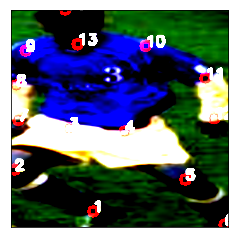

[[-0.12555066  0.42511016]
 [-0.48678413  0.24008811]
 [-0.23568282  0.05066079]
 [ 0.01982379  0.05947137]
 [ 0.29735684  0.28414094]
 [ 0.48237884  0.49118942]
 [-0.46475771  0.01101321]
 [-0.47356829 -0.15198237]
 [-0.42951542 -0.31057268]
 [ 0.12114537 -0.32819384]
 [ 0.3942731  -0.17841411]
 [ 0.42951542  0.00220263]
 [-0.19603524 -0.34140968]
 [-0.25330395 -0.5       ]]


In [66]:
# plot example image (normalized)
img, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx, gcn=None, bbox_extension_range=None, shift=None)

h,w,d=img.shape
print(h,w,d)

numJoints, t = joints.shape
print(numJoints)

circSize=10
font = cv2.FONT_HERSHEY_SIMPLEX

#cv2.drawKeypoints(img,joints,img)
for i in range(numJoints):
    #print(joints[i,:])
    x = joints[i,0]
    y = joints[i,1]
    
    # transform 
    x = int(w/2 + w*x)
    y = int(h/2 + h*y)    
    #print(x,y)
    
    cv2.circle(img, (x, y), 5, (255, 0, 0)) #, -1)
    
    cv2.putText(img, str(i+1), (x,y), font, 0.5, (255,255,255), 1, cv2.LINE_AA)
#    cv2.text(img, (x, y), 5, (255, 0, 0)) #, -1)
    # https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html
    

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()



print(joints)

In [7]:
from chainer import iterators
test_iterator = iterators.MultiprocessIterator(
        test_dataset, batch_size=128,
        repeat=False, shuffle=False,
        n_processes=1, n_prefetch=1)

In [18]:
##code from def test_net(test_dataset, test_iterator, dataset_name, snapshot_path):
from scripts import regressionnet

## set the checkpoint that you want to use
snapshot_path=os.path.expanduser('~/src/deeppose/out/lsp_alexnet_imagenet_small/checkpoint-150000')

if dataset_name not in ['lsp', 'mpii']:
    raise ValueError('Unknown dataset: {}'.format(dataset_name))

net, loss_op, pose_loss_op, train_op = regressionnet.create_regression_net( # in scripts.
        n_joints=16 if dataset_name == 'mpii' else 14,
        init_snapshot_path=snapshot_path,
        is_resume=True,
        net_type='Alexnet',
        optimizer_type='momentum',
        gpu_memory_fraction=0.32)  # Set how much GPU memory to reserve for the network
print(snapshot_path)

Alexnet::__create_architecture()
Initializing conv1 with random
Initializing conv2 with random
Initializing conv3 with random
Initializing conv4 with random
Initializing conv5 with random
Initializing fc6 with random
Initializing fc7 with random
Initializing fc8 with random
Initializing layer 99 with random
Restoring everything from snapshot and resuming
INFO:tensorflow:Restoring parameters from /home/yyoo/src/deeppose/out/lsp_alexnet_imagenet_small/checkpoint-150000


INFO:tensorflow:Restoring parameters from /home/yyoo/src/deeppose/out/lsp_alexnet_imagenet_small/checkpoint-150000


Creating optimizer momentum
Conv LR: Tensor("lr/conv_lr:0", shape=(), dtype=float32), FC LR: Tensor("lr/fc_lr:0", shape=(), dtype=float32)
INFO:tensorflow:Summary name grad_norms/conv1/weight:0 is illegal; using grad_norms/conv1/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv1/weight:0 is illegal; using grad_norms/conv1/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv1/bias:0 is illegal; using grad_norms/conv1/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv1/bias:0 is illegal; using grad_norms/conv1/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv2/weight:0 is illegal; using grad_norms/conv2/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv2/weight:0 is illegal; using grad_norms/conv2/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv2/bias:0 is illegal; using grad_norms/conv2/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv2/bias:0 is illegal; using grad_norms/conv2/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv3/weight:0 is illegal; using grad_norms/conv3/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv3/weight:0 is illegal; using grad_norms/conv3/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv3/bias:0 is illegal; using grad_norms/conv3/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv3/bias:0 is illegal; using grad_norms/conv3/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv4/weight:0 is illegal; using grad_norms/conv4/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv4/weight:0 is illegal; using grad_norms/conv4/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv4/bias:0 is illegal; using grad_norms/conv4/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv4/bias:0 is illegal; using grad_norms/conv4/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv5/weight:0 is illegal; using grad_norms/conv5/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv5/weight:0 is illegal; using grad_norms/conv5/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/conv5/bias:0 is illegal; using grad_norms/conv5/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/conv5/bias:0 is illegal; using grad_norms/conv5/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/fc6/weight:0 is illegal; using grad_norms/fc6/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/fc6/weight:0 is illegal; using grad_norms/fc6/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/fc6/bias:0 is illegal; using grad_norms/fc6/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/fc6/bias:0 is illegal; using grad_norms/fc6/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/fc7/weight:0 is illegal; using grad_norms/fc7/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/fc7/weight:0 is illegal; using grad_norms/fc7/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/fc7/bias:0 is illegal; using grad_norms/fc7/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/fc7/bias:0 is illegal; using grad_norms/fc7/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/fc_regression/weight:0 is illegal; using grad_norms/fc_regression/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/fc_regression/weight:0 is illegal; using grad_norms/fc_regression/weight_0 instead.


INFO:tensorflow:Summary name grad_norms/fc_regression/bias:0 is illegal; using grad_norms/fc_regression/bias_0 instead.


INFO:tensorflow:Summary name grad_norms/fc_regression/bias:0 is illegal; using grad_norms/fc_regression/bias_0 instead.


uninit vars: ['conv1/weight/Momentum:0', 'conv1/bias/Momentum:0', 'conv2/weight/Momentum:0', 'conv2/bias/Momentum:0', 'conv3/weight/Momentum:0', 'conv3/bias/Momentum:0', 'conv4/weight/Momentum:0', 'conv4/bias/Momentum:0', 'conv5/weight/Momentum:0', 'conv5/bias/Momentum:0', 'fc6/weight/Momentum:0', 'fc6/bias/Momentum:0', 'fc7/weight/Momentum:0', 'fc7/bias/Momentum:0', 'fc_regression/weight/Momentum:0', 'fc_regression/bias/Momentum:0']
Elapsed time for finding uninitialized variables: 0.77s
Elapsed time to init them: 0.22s
/home/yyoo/src/deeppose/out/lsp_alexnet_imagenet_small/checkpoint-150000


In [19]:
import numpy as np

for ext in np.linspace(1.0, 2.0, 6, True):
    print('\n====================')
    print('BBOX EXTENSION:', ext)
    test_dataset.bbox_extension_range = (ext, ext)
    regressionnet.evaluate_pcp(net, pose_loss_op, test_iterator, None, # in scripts.
                               dataset_name=dataset_name,
                               tag_prefix='test')

  0%|          | 0/8 [00:00<?, ?it/s]


BBOX EXTENSION: 1.0
1000


100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


Step 150000 test/pose_loss = 0.078
lsp


/home/yyoo/src/deeppose/poseevaluation/pcp.py:88: RuntimeWarning: divide by zero encountered in float_scalars
  gt_joints[i]['sticks'][stick_id, :2]) / gt_stick_len
/home/yyoo/src/deeppose/poseevaluation/pcp.py:90: RuntimeWarning: divide by zero encountered in float_scalars
  gt_joints[i]['sticks'][stick_id, 2:]) / gt_stick_len


Step	 150000	 test/mPCP	 0.325
Step 150000 test/parts_PCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.105	0.822	0.194	0.070	0.520	0.240	0.325
lsp


/home/yyoo/src/deeppose/poseevaluation/pcp.py:51: RuntimeWarning: divide by zero encountered in float_scalars
  gt_joints[i]['sticks'][stick_id, :2]) / gt_stick_len
/home/yyoo/src/deeppose/poseevaluation/pcp.py:53: RuntimeWarning: divide by zero encountered in float_scalars
  gt_joints[i]['sticks'][stick_id, 2:]) / gt_stick_len


Step	 150000	 test/mRelaxedPCP	 0.442
Step 150000 test/parts_RelaxedPCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.203	0.893	0.314	0.139	0.694	0.411	0.442
lsp


  0%|          | 0/8 [00:00<?, ?it/s]

Step	 150000	 test/mPCKh	 0.249
Step	 150000	 test/mSymmetricPCKh	 0.247
Step 150000 test/parts_SymmetricPCKh:
Head	Neck	Shoulder	Elbow	Wrist	Hip	Knee	Ankle
0.111	0.359	0.283	0.234	0.121	0.544	0.257	0.067

BBOX EXTENSION: 1.2
1000


100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


Step 150000 test/pose_loss = 0.047
lsp
Step	 150000	 test/mPCP	 0.462
Step 150000 test/parts_PCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.398	0.868	0.309	0.111	0.635	0.451	0.462
lsp
Step	 150000	 test/mRelaxedPCP	 0.559
Step 150000 test/parts_RelaxedPCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.495	0.914	0.419	0.202	0.757	0.568	0.559
lsp
Step	 150000	 test/mPCKh	 0.373

  0%|          | 0/8 [00:00<?, ?it/s]


Step	 150000	 test/mSymmetricPCKh	 0.389
Step 150000 test/parts_SymmetricPCKh:
Head	Neck	Shoulder	Elbow	Wrist	Hip	Knee	Ankle
0.410	0.594	0.455	0.296	0.167	0.611	0.402	0.179

BBOX EXTENSION: 1.4
1000


100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


Step 150000 test/pose_loss = 0.036
lsp
Step	 150000	 test/mPCP	 0.475
Step 150000 test/parts_PCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.421	0.869	0.327	0.133	0.649	0.453	0.475
lsp
Step	 150000	 test/mRelaxedPCP	 0.568
Step 150000 test/parts_RelaxedPCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.512	0.911	0.430	0.212	0.762	0.584	0.568
lsp


  0%|          | 0/8 [00:00<?, ?it/s]

Step	 150000	 test/mPCKh	 0.390
Step	 150000	 test/mSymmetricPCKh	 0.407
Step 150000 test/parts_SymmetricPCKh:
Head	Neck	Shoulder	Elbow	Wrist	Hip	Knee	Ankle
0.439	0.612	0.466	0.317	0.191	0.613	0.412	0.205

BBOX EXTENSION: 1.6
1000


100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


Step 150000 test/pose_loss = 0.030
lsp
Step	 150000	 test/mPCP	 0.464
Step 150000 test/parts_PCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.384	0.864	0.320	0.132	0.641	0.446	0.464
lsp
Step	 150000	 test/mRelaxedPCP	 0.561
Step 150000 test/parts_RelaxedPCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.488	0.911	0.423	0.221	0.754	0.572	0.561
lsp


  0%|          | 0/8 [00:00<?, ?it/s]

Step	 150000	 test/mPCKh	 0.377
Step	 150000	 test/mSymmetricPCKh	 0.392
Step 150000 test/parts_SymmetricPCKh:
Head	Neck	Shoulder	Elbow	Wrist	Hip	Knee	Ankle
0.403	0.578	0.432	0.333	0.199	0.598	0.407	0.183

BBOX EXTENSION: 1.8
1000


100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


Step 150000 test/pose_loss = 0.027
lsp
Step	 150000	 test/mPCP	 0.454
Step 150000 test/parts_PCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.360	0.856	0.318	0.134	0.624	0.433	0.454
lsp
Step	 150000	 test/mRelaxedPCP	 0.553
Step 150000 test/parts_RelaxedPCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.468	0.905	0.421	0.221	0.740	0.564	0.553
lsp


  0%|          | 0/8 [00:00<?, ?it/s]

Step	 150000	 test/mPCKh	 0.367
Step	 150000	 test/mSymmetricPCKh	 0.380
Step 150000 test/parts_SymmetricPCKh:
Head	Neck	Shoulder	Elbow	Wrist	Hip	Knee	Ankle
0.380	0.559	0.432	0.328	0.193	0.583	0.394	0.171

BBOX EXTENSION: 2.0
1000


100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


Step 150000 test/pose_loss = 0.027
lsp
Step	 150000	 test/mPCP	 0.452
Step 150000 test/parts_PCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.354	0.858	0.313	0.132	0.623	0.431	0.452
lsp
Step	 150000	 test/mRelaxedPCP	 0.552
Step 150000 test/parts_RelaxedPCP:
Head	Torso	U Arm	L Arm	U Leg	L Leg	mean
0.464	0.905	0.420	0.220	0.740	0.564	0.552
lsp
Step	 150000	 test/mPCKh	 0.366
Step	 150000	 test/mSymmetricPCKh	 0.378
Step 150000 test/parts_SymmetricPCKh:
Head	Neck	Shoulder	Elbow	Wrist	Hip	Knee	Ankle
0.373	0.559	0.432	0.322	0.193	0.582	0.394	0.169
